# Twitter Topic Classification

## Business Understanding

The goal of this task is to develop a Natural Language Processing (NLP) pipeline to classify tweets into six categories. The categories are as follows:

1. Sports and gaming
2. Pop culture and entertainment
3. Daily life
4. Science and Technology
5. Business and Entrepreneurship
6. Arts and culture

By classifying tweets into these categories, we aim to gain insights into the different topics and themes discussed on social media. This can help in various applications such as understanding user preferences, targeted advertising, sentiment analysis, and trend analysis.

The NLP pipeline will involve various steps such as data preprocessing, text cleaning, feature extraction, model training, and evaluation. By building an accurate classification model, we can automate the process of categorizing tweets and gain valuable insights from large volumes of social media data.

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data to a dataframe

data = pd.read_json('CETM47-22_23-AS2-Data.json')
data.head(10)

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming
5,"I don’t care. you gave him a shot, he is strug...",2019-09-08,4,1170516891053580288,sports_&_gaming
6,Okay how can I watch the {@Arkansas State Foot...,2019-09-08,4,1170516916554936322,sports_&_gaming
7,Check out largest crowds ever for a basketball...,2019-09-08,4,1170516940902805504,sports_&_gaming
8,I voted #WeWantNCAAFootball on {{USERNAME}} . ...,2019-09-08,4,1170517092489187328,sports_&_gaming
9,Streaming a new game #minionmasters come stop ...,2019-09-08,4,1170546366566846464,sports_&_gaming


In [3]:
data.sample(10)

,text,date,label,id,label_name
3059,The Fight or Fright skin recolors for the {@Ap...,2020-10-21,4,1318760765277433856,sports_&_gaming
3415,Played ex-Energy for {@ESEA@} & {{USERNAME}} #...,2021-01-24,4,1353430413390168064,sports_&_gaming
5829,I know it’s a night game but hit me with the l...,2021-04-18,4,1383842014458908680,sports_&_gaming
4308,Check out my new album Dangerous Island dist...,2021-08-18,2,1428053255565811721,pop_culture
2095,Drinks absolute Sister drinks tequila ... 15mi...,2020-05-10,3,1259299330126725120,daily_life
2725,"Ah, how I miss HUGS! This was ovbi Pre-COVID {...",2020-08-09,3,1292608944398110720,daily_life
4750,Philadelphia clearly didn’t take a page out of...,2020-09-06,4,1302423453308522497,sports_&_gaming
2678,"I, along with many other #PokkenTournamentDX m...",2020-08-02,4,1290041386977202176,sports_&_gaming
2611,SO FREAKING EXCITED!!!!!!!!!! AUGUST 21 #BT...,2020-07-26,2,1287415764111171584,pop_culture
1877,The last session of conference is like the las...,2020-04-05,2,1246916874987655169,pop_culture


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        6443 non-null   object        
 1   date        6443 non-null   datetime64[ns]
 2   label       6443 non-null   int64         
 3   id          6443 non-null   int64         
 4   label_name  6443 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 251.8+ KB


In [5]:
data['label_name'].value_counts()

pop_culture                 2512
sports_&_gaming             2291
daily_life                   883
science_&_technology         326
business_&_entrepreneurs     287
arts_&_culture               144
Name: label_name, dtype: int64

In [6]:
data['label'].value_counts()

2    2512
4    2291
3     883
5     326
1     287
0     144
Name: label, dtype: int64

## Data Preprocessing and Cleaning

In this task, we perform the following steps to preprocess and clean the data:

1. **Remove Stopwords:** We eliminate common words that do not carry significant meaning in the context of the data.

2. **Remove Punctuations, Numbers, and Special Characters:** We get rid of non-alphabetic characters, digits, and symbols.

3. **Tokenization:** We split the text into individual words or tokens.

4. **Lemmatization:** We reduce words to their base or root form to normalize the text.

5. **Vectorization:** We convert the text data into numerical representations to be used in machine learning algorithms.

6. **Splitting the Data into Train and Test Sets:** We divide the dataset into two parts, one for training the model and the other for evaluating its performance.

These steps help prepare the data for further analysis or modeling by reducing noise, standardizing the text, and enabling numerical representation for machine learning algorithms.

In [7]:
import nltk
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
# removing stopwords and punctuation 
stopwords_list  = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [9]:
# creating a function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    word_tokens = word_tokenize(text)

    # Remove stopwords from the text
    text = [word for word in word_tokens if word not in stopwords_list]

    # Remove non-alphabetic characters
    text = [word for word in text if word.isalpha()]

    # Lemmatize the words to their base form
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]

    # Join the cleaned words back into a single string
    text = ' '.join(text)

    # Return the cleaned text
    return text

In [10]:
# applying the clean_text function to the text column
data['clean_text'] = data['text'].apply(clean_text)
data.head()

,text,date,label,id,label_name,clean_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming,clinton lumberkings beat cedar rapid kernel ga...
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,would rather hear eli gold announce auburn gam...
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming,someone take phone away trying look chicago bl...
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming,year ago louisville struggled beat fcs opponen...
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming,anyone know dodger oriole game next thursday f...


## Wordcloud Visualization

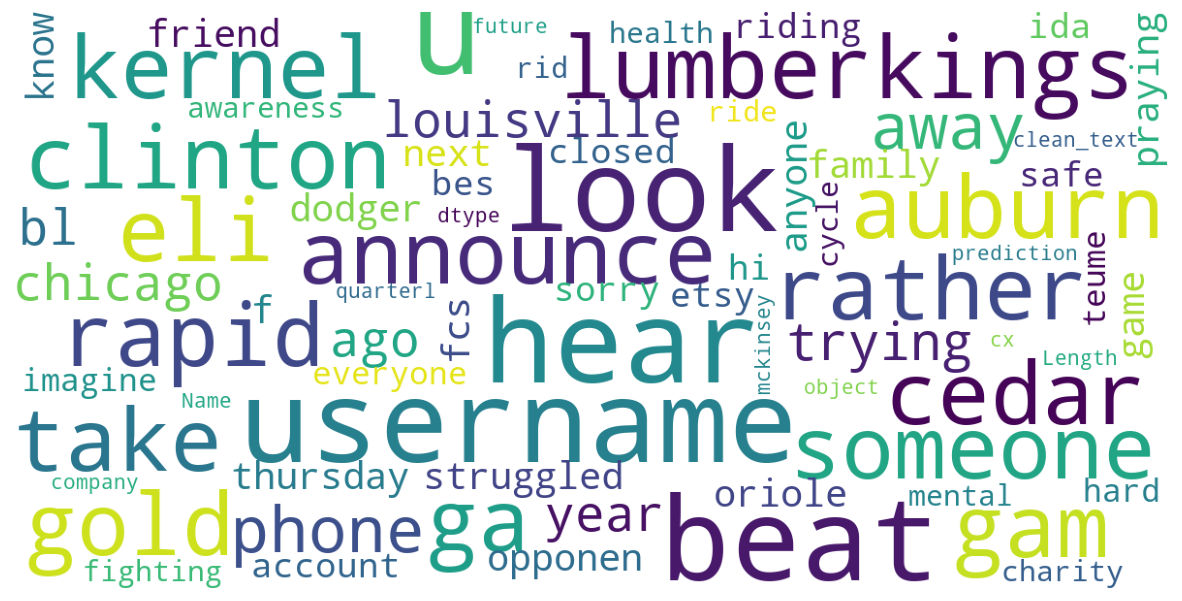

In [11]:
# function to create a wordcloud
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# creating a wordcloud for the text column
show_wordcloud(data['clean_text'])

In [12]:
data.label_name.value_counts()

pop_culture                 2512
sports_&_gaming             2291
daily_life                   883
science_&_technology         326
business_&_entrepreneurs     287
arts_&_culture               144
Name: label_name, dtype: int64

Word cloud for Sports_&_gaming tweets

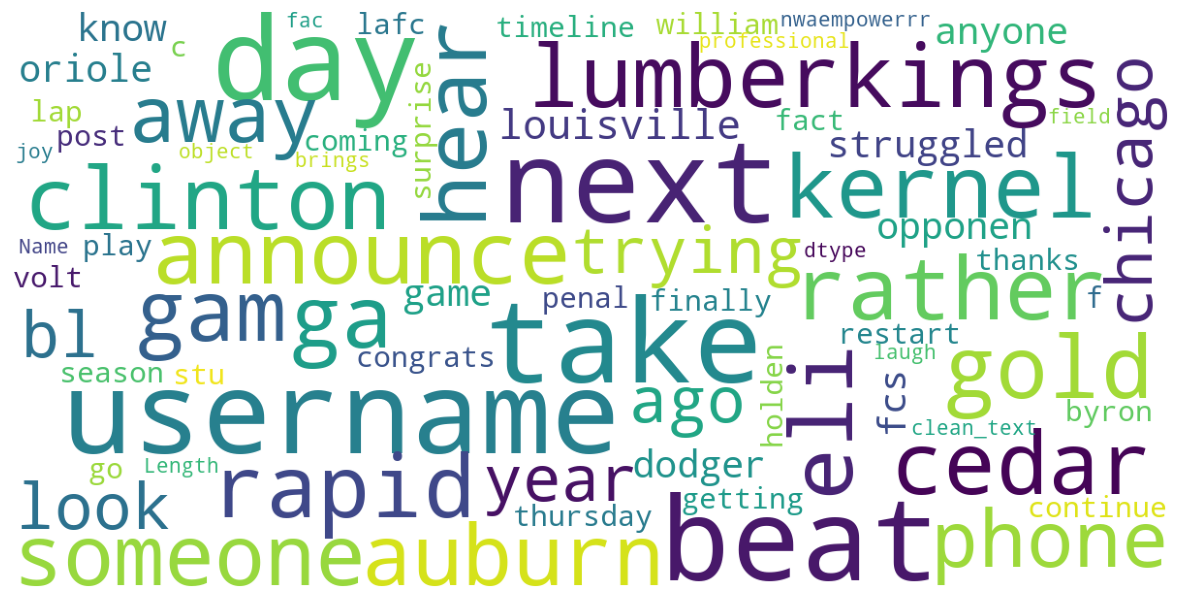

In [13]:
# wordcloud for the text column for the label sports
show_wordcloud(data[data['label_name'] == 'sports_&_gaming']['clean_text'])

word cloud for Pop_culture tweets

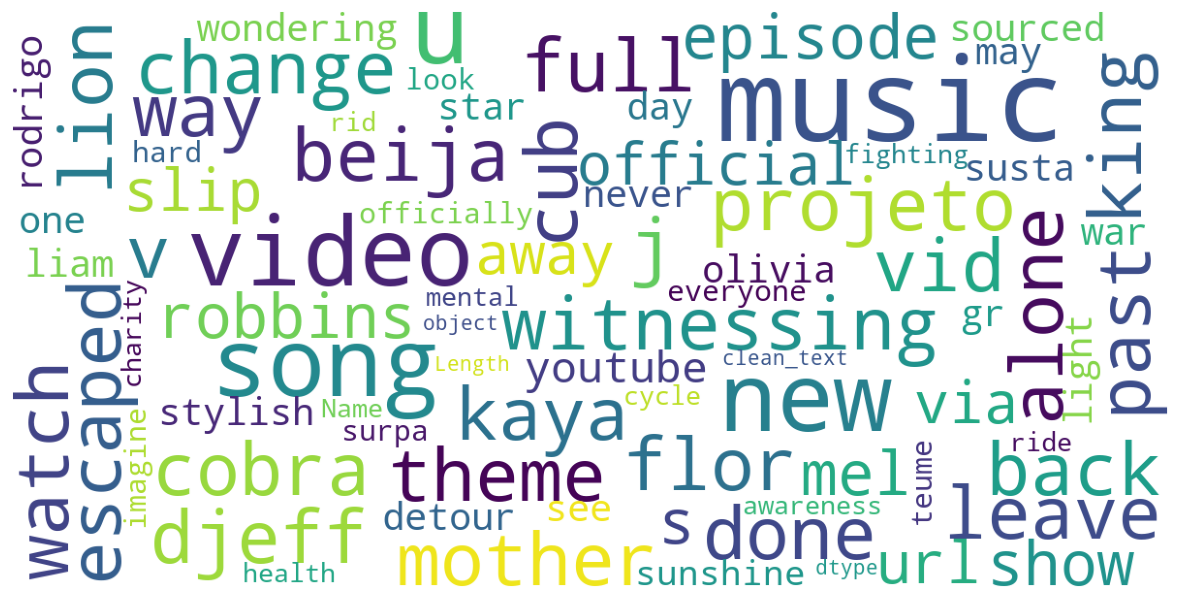

In [14]:
show_wordcloud(data[data['label_name'] == 'pop_culture']['clean_text'])

word cloud for Daily tweets

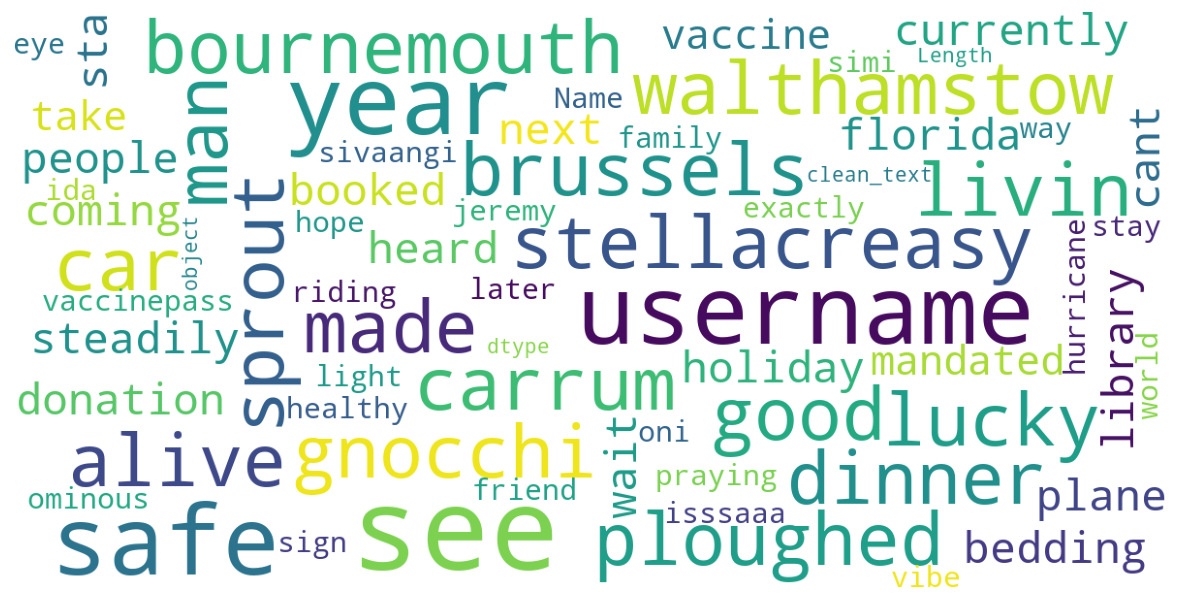

In [15]:
show_wordcloud(data[data['label_name'] == 'daily_life']['clean_text'])

word cloud for science_&_technology tweets

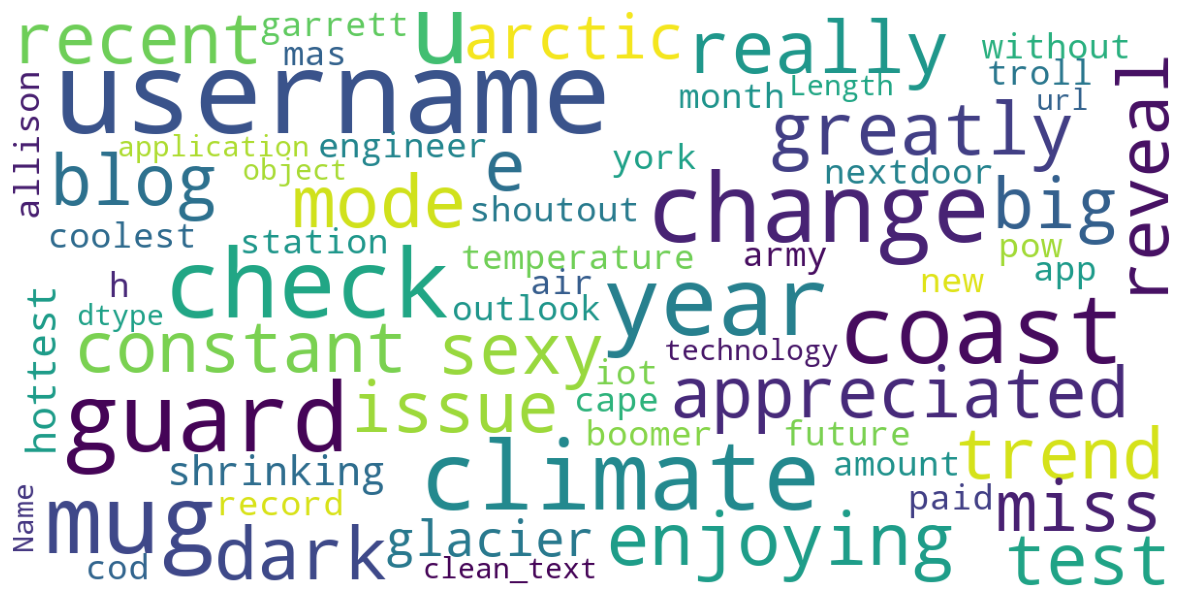

In [16]:
show_wordcloud(data[data['label_name'] == 'science_&_technology']['clean_text'])

word cloud for business_&_entrepreneurs tweets

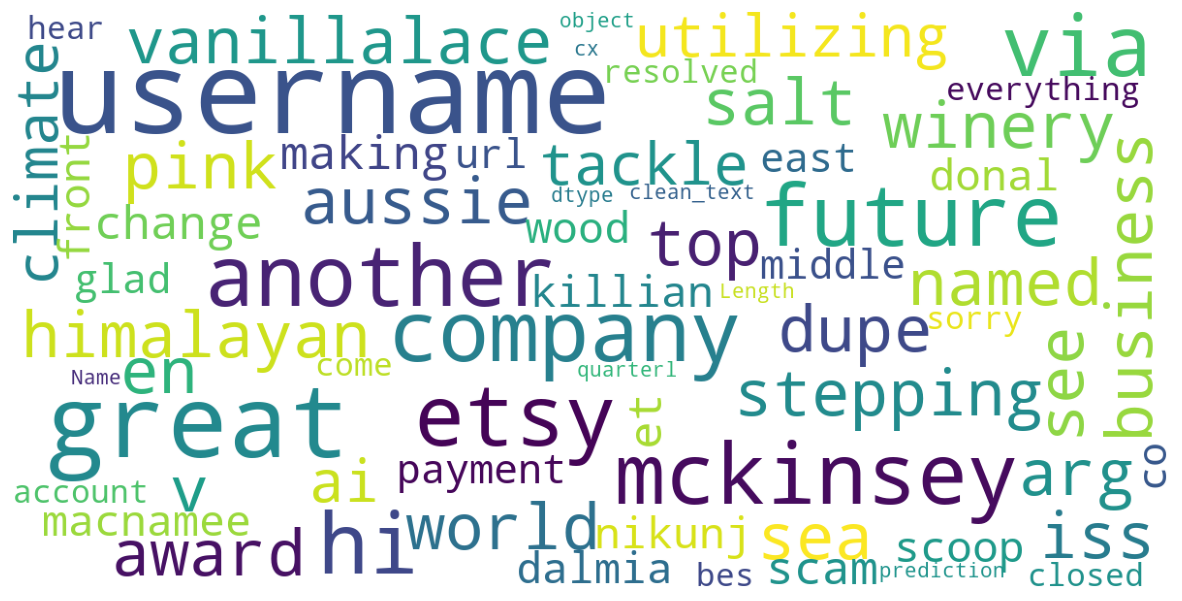

In [17]:
show_wordcloud(data[data['label_name'] == 'business_&_entrepreneurs']['clean_text'])

word cloud for arts_&_culture  tweets

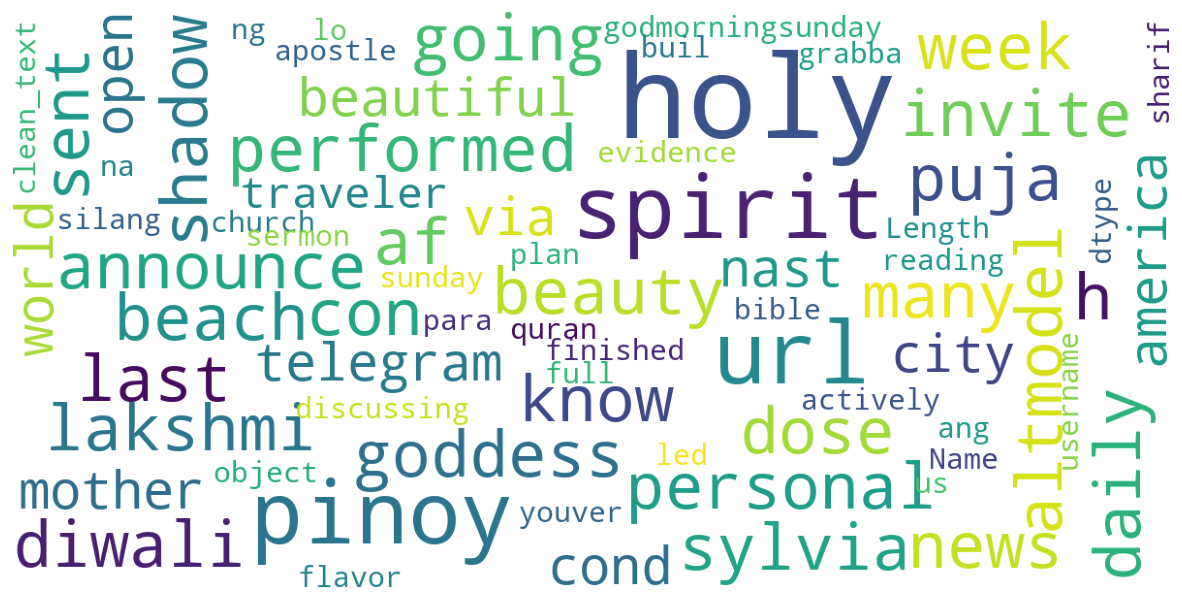

In [18]:
show_wordcloud(data[data['label_name'] == 'arts_&_culture']['clean_text'])

### Vectorization

In [19]:
# function to vectorize the text
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    text_vectorized = vectorizer.fit_transform(text)
    return pd.DataFrame(text_vectorized.toarray(), columns=vectorizer.get_feature_names())

# vectorizing the text column
text_vectorized = vectorize_text(data['clean_text'])

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
# one-hot encoding the label_name column
label_name_onehot = pd.get_dummies(data['label_name'])

label_name_onehot.head()

,arts_&_culture,business_&_entrepreneurs,daily_life,pop_culture,science_&_technology,sports_&_gaming
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [22]:
data.rename(columns={'label': 'Target'}, inplace=True)

In [23]:
data.head()

,text,date,Target,id,label_name,clean_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming,clinton lumberkings beat cedar rapid kernel ga...
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming,would rather hear eli gold announce auburn gam...
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming,someone take phone away trying look chicago bl...
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming,year ago louisville struggled beat fcs opponen...
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming,anyone know dodger oriole game next thursday f...


In [24]:
# creating a dataframe with the vectorized text
data_vectorized = pd.concat([data['Target'], text_vectorized , label_name_onehot], axis=1)
data_vectorized.sample(10)

,Target,aa,aaa,aaaaa,aaaaaaaa,aaaand,aaand,aadar,aafp,aag,...,트레저,파이팅,행복,헹가래,arts_&_culture,business_&_entrepreneurs,daily_life,pop_culture,science_&_technology,sports_&_gaming
2968,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
5602,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
5978,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
5508,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4765,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
1856,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
6106,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
5630,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,0
4390,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4170,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [25]:
# splitting the data into train ,test sets and validation set
from sklearn.model_selection import train_test_split

y = data_vectorized['Target']
X = data_vectorized.drop('Target', axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [26]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)

X_train shape: (4832, 18578)
X_test shape: (1611, 18578)


## Modelling

In this project, we explore various machine learning algorithms to classify tweets into the six predefined categories. The following algorithms are used:

1. **Logistic Regression**: Logistic regression is a linear classification algorithm that models the probability of each category. It works well for binary classification tasks and can be extended to multi-class classification using techniques like one-vs-rest or softmax regression.

2. **Naive Bayes**: Naive Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It is known for its simplicity and efficiency, making it suitable for text classification tasks.

3. **Random Forest**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is robust against overfitting and capable of handling both numerical and categorical features. Random Forest can provide insights into feature importance and handle high-dimensional data effectively.

These algorithms are trained on the preprocessed and vectorized text data to learn the patterns and relationships between the features and the corresponding categories. The models will be evaluated based on various metrics such as accuracy, precision, recall, and F1-score to assess their performance.


## Base Logistic Regression Model

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [32]:
# base model
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# evaluating the model
y_pred = logreg.predict(X_test)
print('Accuracy Score:\n ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))


Accuracy Score:
  1.0
Confusion Matrix: 
 [[ 30   0   0   0   0   0]
 [  0  74   0   0   0   0]
 [  0   0 621   0   0   0]
 [  0   0   0 230   0   0]
 [  0   0   0   0 588   0]
 [  0   0   0   0   0  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       621
           3       1.00      1.00      1.00       230
           4       1.00      1.00      1.00       588
           5       1.00      1.00      1.00        68

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



The base model has an Accuracy of 1.0 which is very good however the model could be overfitting the data. We will use cross validation to check if the model is overfitting the data.

In [33]:
# cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X, y, cv=5)

print('The Models scores are :', scores) 
print('Cross Validation Score: ', scores.mean())

The Models scores are : [1. 1. 1. 1. 1.]
Cross Validation Score:  1.0


## Base Naive Bayes Model

In [34]:
# Base Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# evaluating the model
y_pred = nb_model.predict(X_test)

print('Accuracy Score:\n ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:
  1.0
Confusion Matrix: 
 [[ 30   0   0   0   0   0]
 [  0  74   0   0   0   0]
 [  0   0 621   0   0   0]
 [  0   0   0 230   0   0]
 [  0   0   0   0 588   0]
 [  0   0   0   0   0  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       621
           3       1.00      1.00      1.00       230
           4       1.00      1.00      1.00       588
           5       1.00      1.00      1.00        68

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



## Random Forest Classifier

In [35]:
# Random Forest Classifier
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# evaluating the model
y_pred = forest_model.predict(X_test)

print('Accuracy Score:\n ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:
  1.0
Confusion Matrix: 
 [[ 30   0   0   0   0   0]
 [  0  74   0   0   0   0]
 [  0   0 621   0   0   0]
 [  0   0   0 230   0   0]
 [  0   0   0   0 588   0]
 [  0   0   0   0   0  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       621
           3       1.00      1.00      1.00       230
           4       1.00      1.00      1.00       588
           5       1.00      1.00      1.00        68

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



## Evaluation

In [ ]:
## Evaluation of the model on the test set

# Creating a function that will evaluate the model on the validation set
def evaluate_model(model):
    y_pred = model.predict(X_val)
    print('Accuracy Score:\n ', accuracy_score(y_val, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
    print('Classification Report: \n', classification_report(y_val, y_pred))

# Evaluating the Logistic Regression model
evaluate_model(logreg)